In [1594]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [1595]:
df = df[["Country", "EdLevel", "YearsCodePro","Employment", "ConvertedCompYearly", "Age"]]

df = df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df = df.rename({"EdLevel":"Education"},axis=1)
df = df.rename({"YearsCodePro":"Experience"},axis=1)

In [1596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     83439 non-null  object 
 1   Education   83126 non-null  object 
 2   Experience  61216 non-null  object 
 3   Employment  83323 non-null  object 
 4   Salary      46844 non-null  float64
 5   Age         82407 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.8+ MB


In [1597]:
df = df.dropna()
df.isnull().sum()

Country       0
Education     0
Experience    0
Employment    0
Salary        0
Age           0
dtype: int64

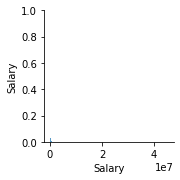

In [1598]:
import seaborn as sns
sns.pairplot(df)

In [1599]:
df = df[df["Employment"]=="Employed full-time"]
df = df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40133 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     40133 non-null  object 
 1   Education   40133 non-null  object 
 2   Experience  40133 non-null  object 
 3   Salary      40133 non-null  float64
 4   Age         40133 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [1600]:
df["Country"].value_counts()

United States of America                                9146
India                                                   3379
Germany                                                 2751
United Kingdom of Great Britain and Northern Ireland    2598
Canada                                                  1548
                                                        ... 
Dominica                                                   1
Libyan Arab Jamahiriya                                     1
Monaco                                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [1601]:
def group_low_count(categories, cutoff):
  category_map ={}
  for i in range(len(categories)):
    if categories.values[i] >= cutoff:
      category_map[categories.index[i]] = categories.index[i]
    else:
      category_map[categories.index[i]] = "Other"
  return category_map




In [1602]:
country_map = group_low_count(df.Country.value_counts(),1000)
print(country_map)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()


{'United States of America': 'United States of America', 'India': 'India', 'Germany': 'Germany', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland', 'Canada': 'Canada', 'France': 'France', 'Brazil': 'Brazil', 'Spain': 'Other', 'Netherlands': 'Other', 'Australia': 'Other', 'Poland': 'Other', 'Italy': 'Other', 'Russian Federation': 'Other', 'Sweden': 'Other', 'Turkey': 'Other', 'Switzerland': 'Other', 'Israel': 'Other', 'Norway': 'Other', 'Mexico': 'Other', 'Ukraine': 'Other', 'Iran, Islamic Republic of...': 'Other', 'Denmark': 'Other', 'Belgium': 'Other', 'Finland': 'Other', 'Austria': 'Other', 'Argentina': 'Other', 'South Africa': 'Other', 'Pakistan': 'Other', 'Czech Republic': 'Other', 'Portugal': 'Other', 'China': 'Other', 'New Zealand': 'Other', 'Romania': 'Other', 'Greece': 'Other', 'Japan': 'Other', 'Colombia': 'Other', 'Bulgaria': 'Other', 'Bangladesh': 'Other', 'Hungary': 'Other', 'Ireland': 'Other', 'Indonesia': 'Other

Other                                                   17979
United States of America                                 9146
India                                                    3379
Germany                                                  2751
United Kingdom of Great Britain and Northern Ireland     2598
Canada                                                   1548
France                                                   1393
Brazil                                                   1339
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


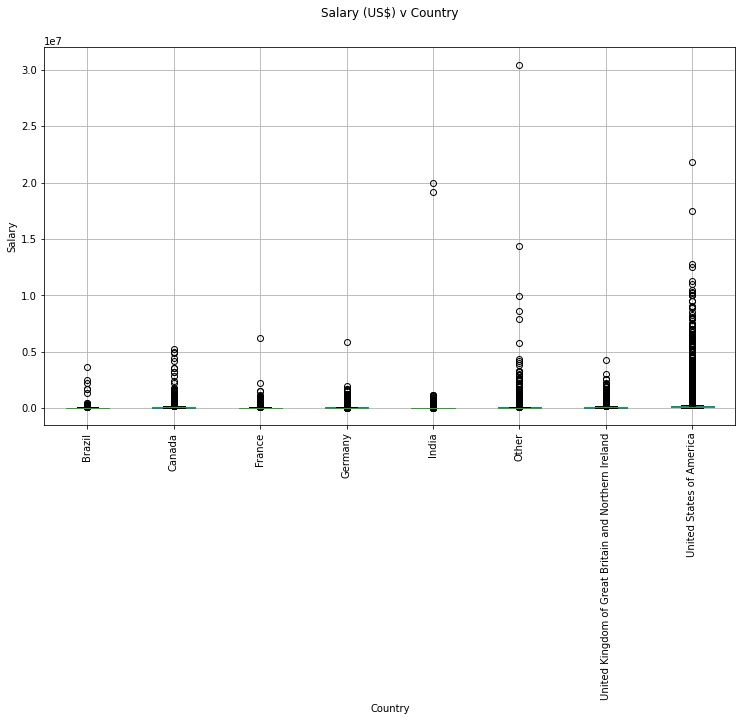

In [1603]:
fg, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [1604]:
df = df[df["Salary"]<=130000]
df = df[df["Salary"]>=10000]
df = df[df["Country"] != 'Other']


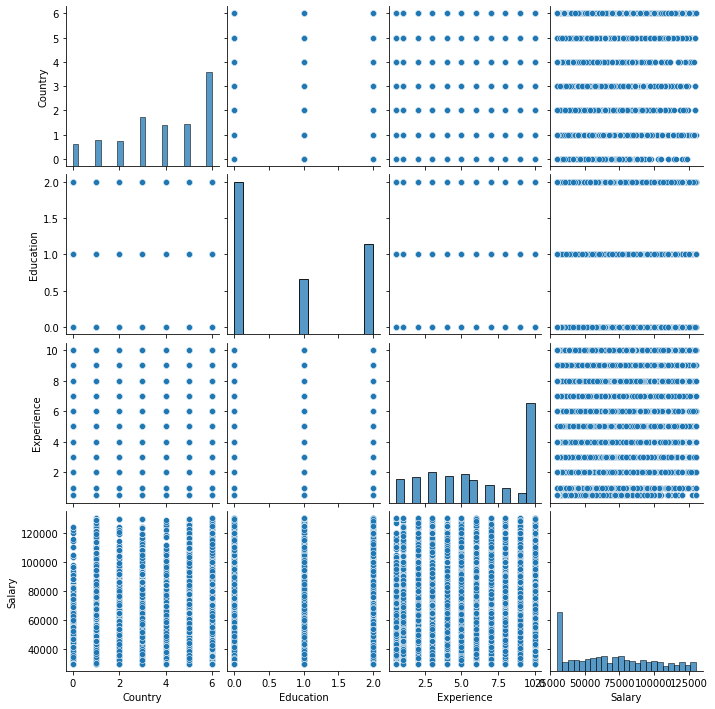

In [1641]:
import seaborn as sns
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


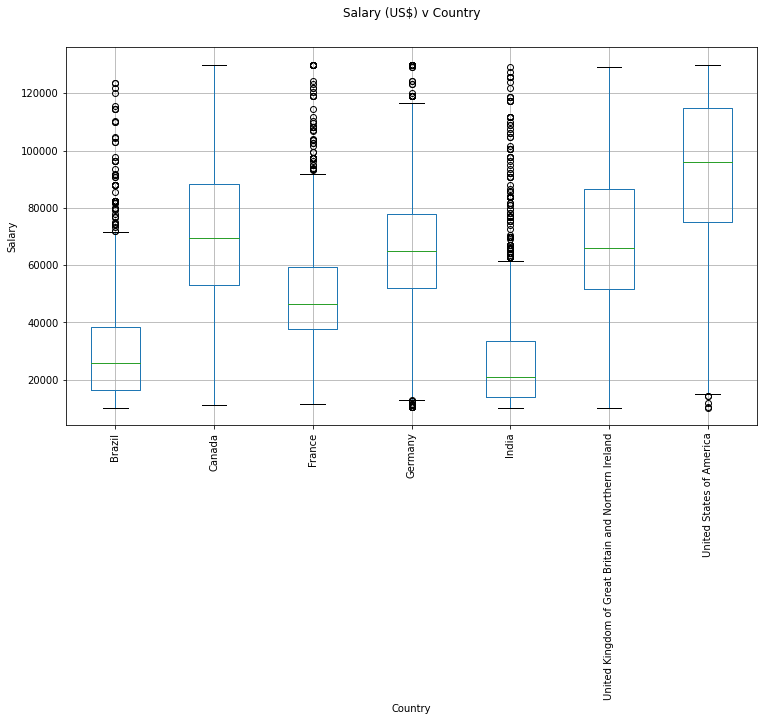

In [1606]:
fg, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [1607]:
df["Experience"].unique()

array(['6', '2', '18', '21', '10', 'Less than 1 year', '3', '15', '12',
       '5', '17', '1', '14', '11', '25', '4', '24', '22', '13', '9', '7',
       '8', '16', '39', '20', '27', '19', '35', '23', '43', '29', '31',
       '42', '34', '46', '33', '40', '37', '28', '30', '32', '26', '47',
       '44', '41', '45', 'More than 50 years', '38', '36', '50', '49',
       '48'], dtype=object)

In [1608]:
def prep_salary(x):
 
  if x <30000:
    return 30000
  return x


df["Salary"] = df["Salary"].apply(prep_salary)

In [1609]:
def prep_experience(x):
  if x == "More than 50 years":
    return 10
  if x == 'Less than 1 year':
    return 0.5
  if int(x) >= 10:
    return 10
  return float(x)


df["Experience"] = df["Experience"].apply(prep_experience)

In [1610]:
# df = df[df["Experience"] <=10]

In [1611]:
df["Education"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Professional degree (JD, MD, etc.)'],
      dtype=object)

In [1612]:
def clean_education(x):
  if "Bachelor’s degree" in x:
    return "Bachelor’s degree"
  if "Master’s degree" in x or "Professional degree" in x or "Other doctoral" in x:
    return "Master’s degree"
  return "Less than Bachelors"


df["Education"] = df["Education"].apply(clean_education)

In [1613]:
df['Education'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than Bachelors'],
      dtype=object)

In [1614]:
# df["Age"].value_counts()

In [1615]:
df = df[df["Age"] != 'Prefer not to say']
df = df[df["Age"] != 'Under 18 years old']
df = df[df["Age"] != '65 years or older']
df["Age"].value_counts()

25-34 years old    8302
35-44 years old    3429
18-24 years old    2343
45-54 years old    1062
55-64 years old     356
Name: Age, dtype: int64

In [1616]:
df = df[["Country", "Education", "Experience", "Salary"]]


from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['Education'] = le_education.fit_transform(df['Education'])
df["Education"].unique()  

array([2, 0, 1])

In [1617]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([3, 1, 2, 5, 6, 0, 4])

In [1618]:
# from sklearn.compose import ColumnTransformer 
# from sklearn.preprocessing import  MinMaxScaler

# scaler = MinMaxScaler()
# X = scaler.fit(df[['Salary']])
# df["Salary"] = scaler.fit_transform(df[['Salary']])

In [1619]:
df.head()

,Country,Education,Experience,Salary
12,3,2,6.0,77290.0
17,1,0,6.0,46135.0
23,2,2,2.0,38915.0
24,3,2,10.0,77831.0
27,5,0,10.0,68507.0


In [1620]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

In [1621]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1622]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg.coef_

array([7388.48334924, 1097.32443292, 2868.5171761 ])

In [1623]:
y_pred = linear_reg.predict(X_test)

In [1624]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [1625]:
error

25352.14780113473

In [1626]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train,y_train.values)

DecisionTreeRegressor(random_state=0)

In [1627]:
y_pred = dec_tree_reg.predict(X_test)

In [1628]:
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

19801.10125004423

In [1629]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train.values)

RandomForestRegressor(random_state=42)

In [1630]:
y_pred = random_forest_reg.predict(X_test)

In [1631]:
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

19800.446859070737

In [1632]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [None,2,4,6,8,10,12]}
regressor = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train,y_train.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [1633]:
regressor = gs.best_estimator_
regressor.fit(X_train, y_train.values)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

19801.10125004423

In [1634]:
# X = np.array([["Canada", "Master’s degree", 15]])
# X

In [1635]:
# X[:,0] = le_country.transform(X[:,0])
# X[:,1] = le_education.transform(X[:,1])
# X = X.astype(float)
# X


In [1636]:
y_pred = regressor.predict(X)
y_pred

array([66481.47142857, 70087.21212121, 39859.90804598, ...,
       49949.65217391, 83218.93506494, 31696.8       ])

In [1637]:
import pickle

In [1638]:
data = {"model": regressor, "le_country":le_country, "le_education":le_education}
with open('saved_steps.pkl','wb') as file:
  pickle.dump(data,file)

In [1639]:
with open('saved_steps.pkl', 'rb') as file:
  data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [1640]:
y_pred = regressor_loaded.predict(X)
y_pred

array([66481.47142857, 70087.21212121, 39859.90804598, ...,
       49949.65217391, 83218.93506494, 31696.8       ])

<!-- pip install streamlit, matplotlib, scikit-learn -->